In [1]:
import pandas as pd
import matplotlib.pyplot as plt

The goal of this project is to look use data to compare how unemployment and the Covid-19 pandemic are related

We will first start by importing a employment data set and then begin cleaning the data

In [2]:
employed = pd.read_excel("https://github.com/Xanitross/Covid_Effects_On_Jobs/blob/main/All_Employees_Thousands_NonFarm.xlsx?raw=true", skiprows=12)
employed

c:\Users\Xanit\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2013,135265,135544,135689,135876,136091,136269,136391.0,136635.0,136819.0,137039.0,137314.0,137368.0
1,2014,137552,137707,137986,138298,138501,138833,139076.0,139258.0,139563.0,139805.0,140089.0,140366.0
2,2015,140562,140829,140924,141202,141540,141695,141989.0,142130.0,142265.0,142585.0,142810.0,143083.0
3,2016,143198,143410,143666,143856,143901,144152,144515.0,144664.0,144961.0,145069.0,145189.0,145408.0
4,2017,145639,145845,145975,146172,146389,146588,146772.0,146907.0,146999.0,147147.0,147377.0,147521.0
5,2018,147670,148058,148281,148426,148755,148966,149022.0,149272.0,149361.0,149526.0,149622.0,149805.0
6,2019,150114,150092,150320,150563,150630,150797,150879.0,151111.0,151318.0,151447.0,151662.0,151764.0
7,2020,152098,152371,150944,130430,133055,137620,139064.0,140799.0,141760.0,142479.0,142743.0,142475.0
8,2021,142969,143544,144328,144614,145096,145789,146558.0,147221.0,147778.0,148559.0,149173.0,149742.0
9,2022,150106,151010,151424,151678,152042,152412,152980.0,153332.0,153682.0,154006.0,154296.0,154535.0


This data shows how many thousands of people are employed in non-farm jobs in the US by month and year. We're going to start cleaning this data by reorganizing the data to be read in all one column and then combining the month + year into one item. The first step in doing so will be to melt the data-frame

In [3]:
employed = employed.melt("Year")
employed

,Year,variable,value
0,2013,Jan,135265.0
1,2014,Jan,137552.0
2,2015,Jan,140562.0
3,2016,Jan,143198.0
4,2017,Jan,145639.0
...,...,...,...
127,2019,Dec,151764.0
128,2020,Dec,142475.0
129,2021,Dec,149742.0
130,2022,Dec,154535.0


This created the new variable and value columns, which we will use to create the year & month column.

In [4]:
employed["Year & Month"] = employed["Year"].astype(str) + " " + employed["variable"].astype(str)
employed["Number Employed"] = employed["value"]
employed.drop(["Year", "variable", "value"], axis=1, inplace=True)
employed

,Year & Month,Number Employed
0,2013 Jan,135265.0
1,2014 Jan,137552.0
2,2015 Jan,140562.0
3,2016 Jan,143198.0
4,2017 Jan,145639.0
...,...,...
127,2019 Dec,151764.0
128,2020 Dec,142475.0
129,2021 Dec,149742.0
130,2022 Dec,154535.0


Our next step is to remove the blank or "Not a Number" rows

In [5]:
employed.dropna(inplace=True)
employed

,Year & Month,Number Employed
0,2013 Jan,135265.0
1,2014 Jan,137552.0
2,2015 Jan,140562.0
3,2016 Jan,143198.0
4,2017 Jan,145639.0
...,...,...
126,2018 Dec,149805.0
127,2019 Dec,151764.0
128,2020 Dec,142475.0
129,2021 Dec,149742.0


Now we need to re-sort the data as it is currently organized by the month name, when we want to look at this data month by month in chronological order

In [6]:
employed["YYYY-mm"] = pd.to_datetime(employed["Year & Month"], format="%Y %b").dt.strftime("%Y-%m")
employed.sort_values("YYYY-mm", inplace=True)
employed.drop(["YYYY-mm"], axis=1, inplace=True)
employed

,Year & Month,Number Employed
0,2013 Jan,135265.0
11,2013 Feb,135544.0
22,2013 Mar,135689.0
33,2013 Apr,135876.0
44,2013 May,136091.0
...,...,...
21,2023 Feb,155255.0
32,2023 Mar,155472.0
43,2023 Apr,155689.0
54,2023 May,155995.0


We will now update the data-frame to make the Year and Month column into the index

In [7]:
employed.set_index(["Year & Month"], inplace=True)
employed

,Number Employed
Year & Month,
2013 Jan,135265.0
2013 Feb,135544.0
2013 Mar,135689.0
2013 Apr,135876.0
2013 May,136091.0
...,...
2023 Feb,155255.0
2023 Mar,155472.0
2023 Apr,155689.0


Next we will update the numbers used to be integers instead of float values

In [8]:
employed = employed.astype("int")
employed

,Number Employed
Year & Month,
2013 Jan,135265
2013 Feb,135544
2013 Mar,135689
2013 Apr,135876
2013 May,136091
...,...
2023 Feb,155255
2023 Mar,155472
2023 Apr,155689


Let's now get a look at the data by visualizing it as a bar chart, setting a limit so we just focus on the data between 120 million and 160 million employees, instead of starting from 0

(120000.0, 160000.0)

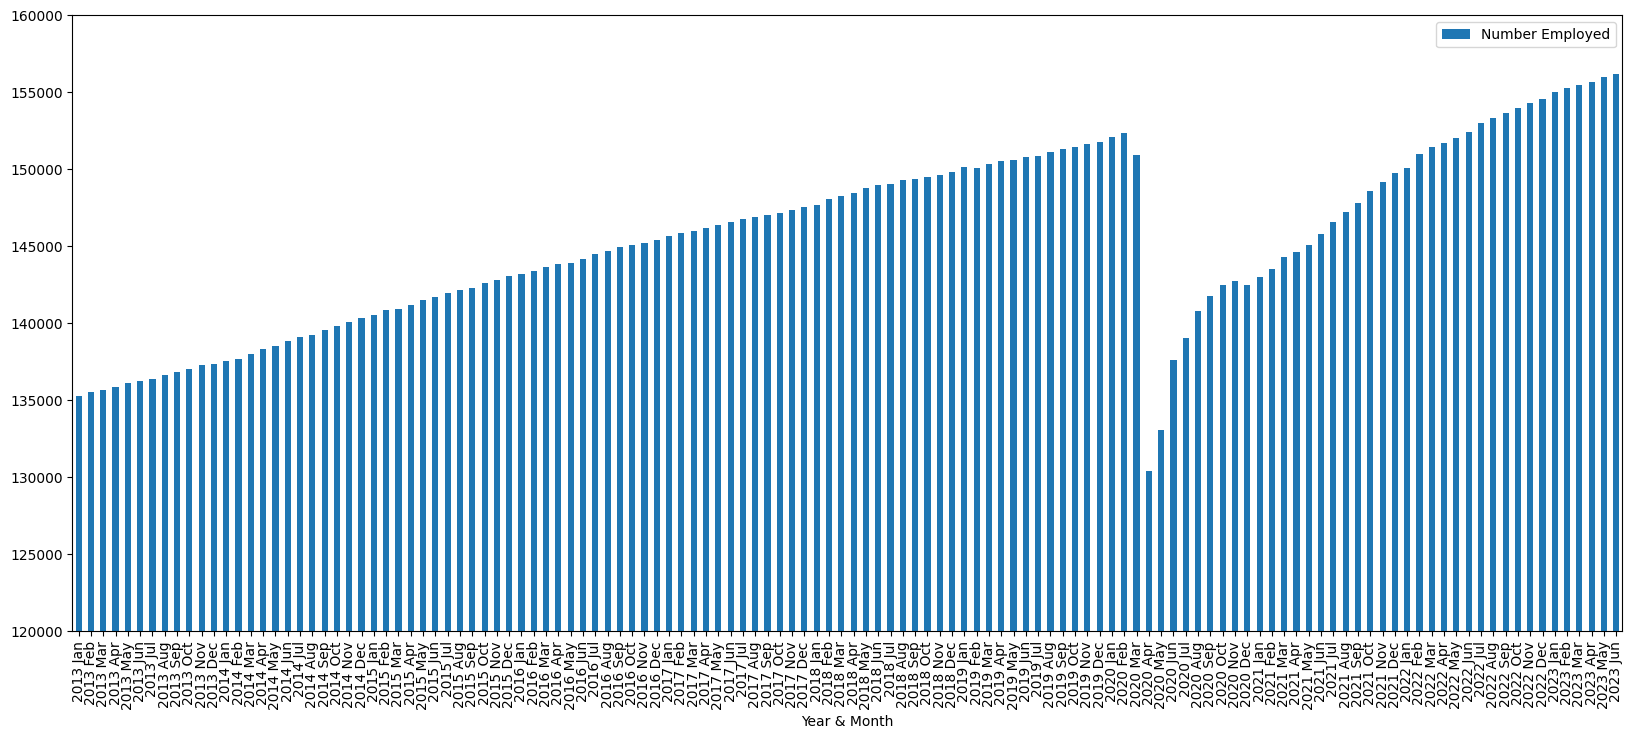

In [9]:
employed.plot.bar(figsize=(20, 8))
plt.ylim(120000, 160000)

Now let's look at trends in the data by comparing each of the values with how it has changed over the previous month, we will do this by creating a new column that shows how many thousands of employees were gained or lost in a month.

In [10]:
employed["previous"] = employed["Number Employed"].shift(1)
employed["Employed Change"] = employed["Number Employed"] - employed["previous"]
employed.drop(["previous"], axis=1, inplace=True)
employed = employed.astype("Int64")
employed

,Number Employed,Employed Change
Year & Month,,
2013 Jan,135265,<NA>
2013 Feb,135544,279
2013 Mar,135689,145
2013 Apr,135876,187
2013 May,136091,215
...,...,...
2023 Feb,155255,248
2023 Mar,155472,217
2023 Apr,155689,217


Now let's look at the full data so we can look at the specific data for the dip in Mar 2020 that we saw in the bar chart

In [11]:
print(employed.to_string())

              Number Employed  Employed Change
Year & Month                                  
2013 Jan               135265             <NA>
2013 Feb               135544              279
2013 Mar               135689              145
2013 Apr               135876              187
2013 May               136091              215
2013 Jun               136269              178
2013 Jul               136391              122
2013 Aug               136635              244
2013 Sep               136819              184
2013 Oct               137039              220
2013 Nov               137314              275
2013 Dec               137368               54
2014 Jan               137552              184
2014 Feb               137707              155
2014 Mar               137986              279
2014 Apr               138298              312
2014 May               138501              203
2014 Jun               138833              332
2014 Jul               139076              243
2014 Aug     

Next let's get some averages for this dataset, so we will find the mean and median numbers.

In [12]:
employed.mean()

Number Employed    145397.325397
Employed Change       167.512000
dtype: float64

In [13]:
employed.median()

Number Employed    145714.0
Employed Change       232.0
dtype: float64

These numbers show that on average 167-232 thousand jobs are added each month under normal circumstances. If we look at the data from 2020 we can see that right before the sharp decline the peak number of jobs was 152,371 thousand (152,371,000) in Feb 2020, if we then look for the point when we again reach that number of jobs it does not happen until Jun 2022 when the number of jobs reached 152,412 thousand (152,412,000). This means it took 27 months to recover to the Feb 2020 point and it would reason that if Covid-19 had not occurred then those 27 months of growth would have led to a Jun 2022 total that was 4509-6264 thousand higher than the Feb 2020 peak.

<Axes: xlabel='Year & Month'>

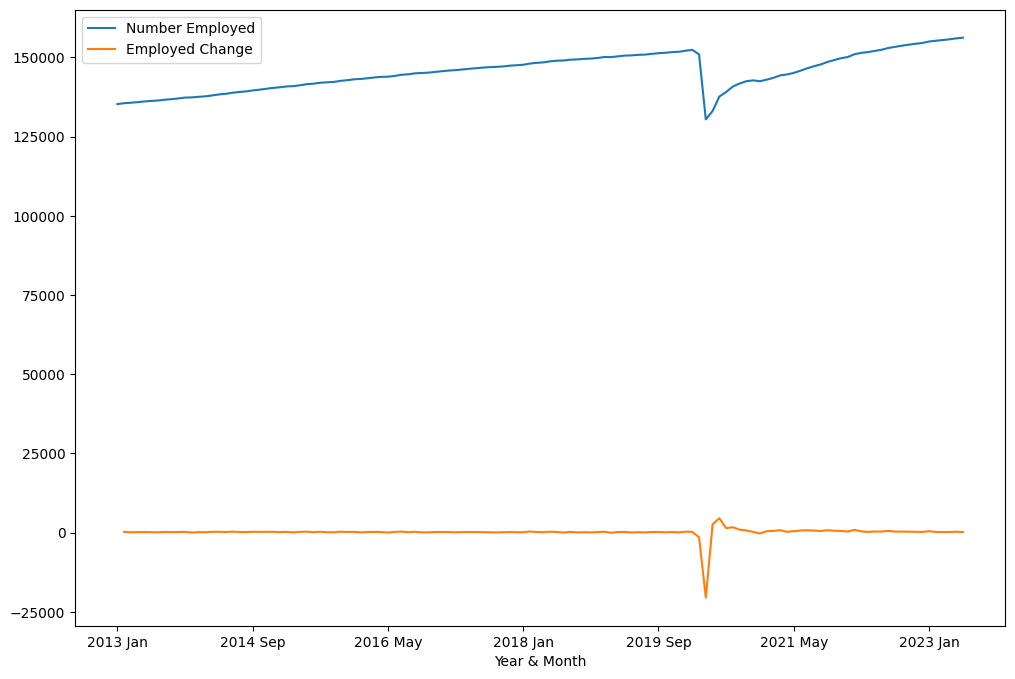

In [14]:
employed.plot.line(figsize=(12, 8))

Now let's look at a second factor, the unemployment rate, to see if there is anything else that could relate to this change

In [15]:
unemployment = pd.read_excel("https://github.com/Xanitross/Covid_Effects_On_Jobs/blob/main/Unemployment_Rate_Monthly.xlsx?raw=true", skiprows=11)
unemployment

c:\Users\Xanit\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
1,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
2,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
3,2016,4.8,4.9,5.0,5.1,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
4,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.3,4.2,4.2,4.1
5,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9
6,2019,4.0,3.8,3.8,3.6,3.7,3.6,3.7,3.7,3.5,3.6,3.6,3.6
7,2020,3.5,3.5,4.4,14.7,13.2,11.0,10.2,8.4,7.9,6.9,6.7,6.7
8,2021,6.3,6.2,6.1,6.1,5.8,5.9,5.4,5.2,4.8,4.5,4.2,3.9
9,2022,4.0,3.8,3.6,3.6,3.6,3.6,3.5,3.7,3.5,3.7,3.6,3.5


Let's clean this data in the same way we did with the employment numbers

In [16]:
unemployment = unemployment.melt("Year")
unemployment["Year & Month"] = unemployment["Year"].astype(str) + " " + unemployment["variable"].astype(str)
unemployment.drop(["Year", "variable"], axis=1, inplace=True)
unemployment = unemployment[["Year & Month", "value"]]
unemployment.dropna(inplace=True)
unemployment["YYYY-mm"] = pd.to_datetime(unemployment["Year & Month"], format="%Y %b").dt.strftime("%Y-%m")
unemployment.sort_values("YYYY-mm", inplace=True)
unemployment["Unemployment Rate"] = unemployment["value"]
unemployment.drop(["value", "YYYY-mm"], axis=1, inplace=True)
unemployment.set_index(["Year & Month"], inplace=True)
unemployment

,Unemployment Rate
Year & Month,
2013 Jan,8.0
2013 Feb,7.7
2013 Mar,7.5
2013 Apr,7.6
2013 May,7.5
...,...
2023 Feb,3.6
2023 Mar,3.5
2023 Apr,3.4


Let us now graph this data to see how it trends

(3.0, 15.0)

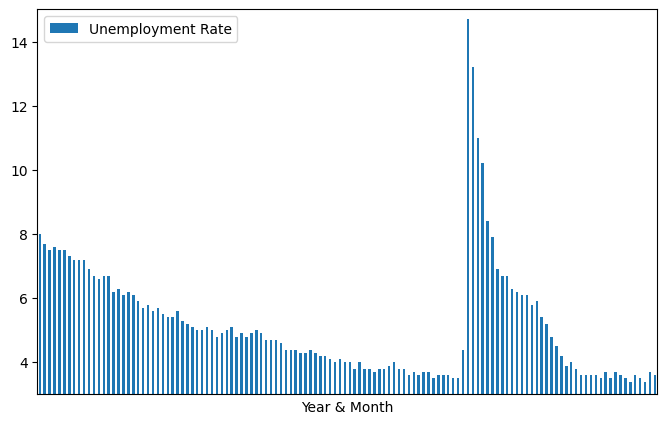

In [17]:
unemployment.plot.bar(xticks=[], figsize=(8, 5))
plt.ylim(3, 15)

Let's now merge these two data sets together so we can find more information based on how they relate to eachother.

In [18]:
df = employed.merge(unemployment, right_index=True, left_index=True)
df

,Number Employed,Employed Change,Unemployment Rate
Year & Month,,,
2013 Jan,135265,<NA>,8.0
2013 Feb,135544,279,7.7
2013 Mar,135689,145,7.5
2013 Apr,135876,187,7.6
2013 May,136091,215,7.5
...,...,...,...
2023 Feb,155255,248,3.6
2023 Mar,155472,217,3.5
2023 Apr,155689,217,3.4


Let's now look at the relationship between the number employed and the unemployment rate through some plots. First we will be doing a scatter plot

<Axes: xlabel='Number Employed', ylabel='Unemployment Rate'>

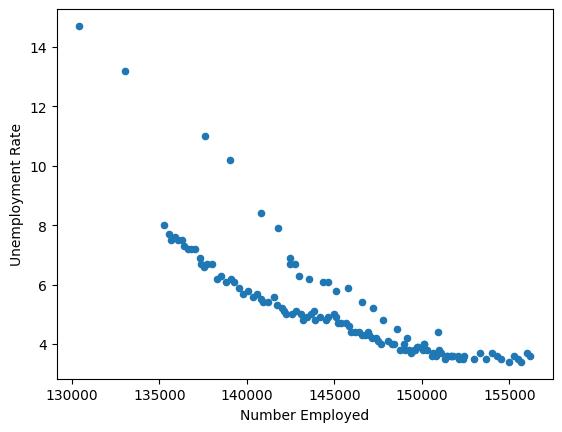

In [19]:
df.plot.scatter(x="Number Employed", y="Unemployment Rate")

Next we will combine a bar graph with a line graph to see how these two relate when looking at the plot in a chronological order

<Axes: xlabel='Year & Month'>

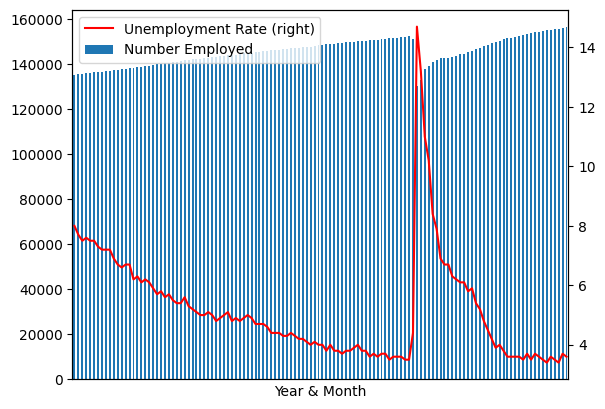

In [20]:
ax = df.plot.line(color="r", y="Unemployment Rate", secondary_y=True)
df.plot(kind="bar", y="Number Employed", xticks=[], ax=ax)

Next we are going to change gears and look at the specifics of the COVID-19 pandemic to see what effect this had on the employment numbers. We will start by importing the COVID hospitalizations and COVID deaths data-sets

In [21]:
Hospitalizations = pd.read_csv("https://github.com/Xanitross/Covid_Effects_On_Jobs/blob/main/data_table_for_weekly_covid19_hospital_admissions_-_the_united_states.csv?raw=true", skiprows=2)
Hospitalizations

,Geography,Date,Weekly COVID-19 Hospital Admissions
0,United States,Jun 24 2023,6277.0
1,United States,Jun 17 2023,6612.0
2,United States,Jun 10 2023,6898.0
3,United States,Jun 3 2023,7394.0
4,United States,May 27 2023,7778.0
...,...,...,...
177,United States,Feb 1 2020,NaN
178,United States,Jan 25 2020,NaN
179,United States,Jan 18 2020,NaN
180,United States,Jan 11 2020,NaN


In [22]:
Deaths = pd.read_csv("https://github.com/Xanitross/Covid_Effects_On_Jobs/blob/main/data_table_for_weekly_deaths__the_united_states.csv?raw=true", skiprows=2)
Deaths

,Geography,Date,Weekly Deaths,Death Data As Of
0,United States,Jun 24 2023,468,Jul 12 2023
1,United States,Jun 17 2023,550,Jul 12 2023
2,United States,Jun 10 2023,576,Jul 12 2023
3,United States,Jun 3 2023,657,Jul 12 2023
4,United States,May 27 2023,719,Jul 12 2023
...,...,...,...,...
177,United States,Feb 1 2020,0,Jul 12 2023
178,United States,Jan 25 2020,3,Jul 12 2023
179,United States,Jan 18 2020,2,Jul 12 2023
180,United States,Jan 11 2020,1,Jul 12 2023


We'll now clean the Hospitalizations data by first filling in the "Not a Number" entries to instead be zeros and renaming our very wordy "Weekly COVID-19 Hospital Admissions" column and dropping the unnecessary "Geography" column

In [23]:
Hospitalizations = Hospitalizations.fillna(0)
Hospitalizations["Hospitalizations"] = Hospitalizations["Weekly COVID-19 Hospital Admissions"].astype("int")
Hospitalizations.drop(["Geography", "Weekly COVID-19 Hospital Admissions"], axis=1, inplace=True)
Hospitalizations

,Date,Hospitalizations
0,Jun 24 2023,6277
1,Jun 17 2023,6612
2,Jun 10 2023,6898
3,Jun 3 2023,7394
4,May 27 2023,7778
...,...,...
177,Feb 1 2020,0
178,Jan 25 2020,0
179,Jan 18 2020,0
180,Jan 11 2020,0


We'll clean up the death data set by removing the two unecessary columns, geography, as this is only data from the United States, and "Death Data As Of" as this was all pulled on the same date

In [24]:
Deaths["Deaths"] = Deaths["Weekly Deaths"]
Deaths.drop(["Geography", "Death Data As Of", "Weekly Deaths"], axis=1, inplace=True)
Deaths

,Date,Deaths
0,Jun 24 2023,468
1,Jun 17 2023,550
2,Jun 10 2023,576
3,Jun 3 2023,657
4,May 27 2023,719
...,...,...
177,Feb 1 2020,0
178,Jan 25 2020,3
179,Jan 18 2020,2
180,Jan 11 2020,1


We will eventually like to combine these two data sets with our employment data set, which will not be parseable as is, since the COVID data is weekly instead of monthly. In order to convert this we will need to first merge our Hospitalizations and Deaths tables into one new dataframe

In [25]:
Covid = Hospitalizations.merge(Deaths, how="outer")
Covid

,Date,Hospitalizations,Deaths
0,Jun 24 2023,6277,468
1,Jun 17 2023,6612,550
2,Jun 10 2023,6898,576
3,Jun 3 2023,7394,657
4,May 27 2023,7778,719
...,...,...,...
177,Feb 1 2020,0,0
178,Jan 25 2020,0,3
179,Jan 18 2020,0,2
180,Jan 11 2020,0,1


Now that they are combined we will start the process of converting this weekly data into monthly data. First we will need to get the date info the right format

In [26]:
Covid["Date"] = pd.to_datetime(Covid["Date"], format="%b %d %Y")
Covid.sort_values("Date", inplace=True)
Covid["Date"] = pd.to_datetime(Covid["Date"], format="%Y %b").dt.strftime("%Y %b")
Covid

,Date,Hospitalizations,Deaths
181,2020 Jan,0,0
180,2020 Jan,0,1
179,2020 Jan,0,2
178,2020 Jan,0,3
177,2020 Feb,0,0
...,...,...,...
4,2023 May,7778,719
3,2023 Jun,7394,657
2,2023 Jun,6898,576
1,2023 Jun,6612,550


Group the weeks together into single month entries

In [27]:
Covid = Covid.groupby("Date").sum()
Covid

,Hospitalizations,Deaths
Date,,
2020 Apr,0,59145
2020 Aug,119203,35494
2020 Dec,396567,85136
2020 Feb,0,25
2020 Jan,0,6
2020 Jul,0,25705
2020 Jun,0,16952
2020 Mar,0,3895
2020 May,0,47041


Now that the dates are indentical on all 4 sets of data we can combine everything together into one final dataframe

In [28]:
Data = df.merge(Covid, right_index=True, left_index=True)
Data

,Number Employed,Employed Change,Unemployment Rate,Hospitalizations,Deaths
2020 Jan,152098,334,3.5,0,6
2020 Feb,152371,273,3.5,0,25
2020 Mar,150944,-1427,4.4,0,3895
2020 Apr,130430,-20514,14.7,0,59145
2020 May,133055,2625,13.2,0,47041
2020 Jun,137620,4565,11.0,0,16952
2020 Jul,139064,1444,10.2,0,25705
2020 Aug,140799,1735,8.4,119203,35494
2020 Sep,141760,961,7.9,97562,18197
2020 Oct,142479,719,6.9,176676,27257


It may be beneficial to see the total number of hospitalizations and deaths over time, so we will create two new columns to track those figures

In [29]:
Data["Cumulitive Hospitalizations"] = Data["Hospitalizations"].cumsum()
Data["Cumulitive Deaths"] = Data["Deaths"].cumsum()
Data

,Number Employed,Employed Change,Unemployment Rate,Hospitalizations,Deaths,Cumulitive Hospitalizations,Cumulitive Deaths
2020 Jan,152098,334,3.5,0,6,0,6
2020 Feb,152371,273,3.5,0,25,0,31
2020 Mar,150944,-1427,4.4,0,3895,0,3926
2020 Apr,130430,-20514,14.7,0,59145,0,63071
2020 May,133055,2625,13.2,0,47041,0,110112
2020 Jun,137620,4565,11.0,0,16952,0,127064
2020 Jul,139064,1444,10.2,0,25705,0,152769
2020 Aug,140799,1735,8.4,119203,35494,119203,188263
2020 Sep,141760,961,7.9,97562,18197,216765,206460
2020 Oct,142479,719,6.9,176676,27257,393441,233717


Now let's graph the data together to see the trends. Due to the size of the cumulitive numbers they will be on the right y-axis

<Axes: >

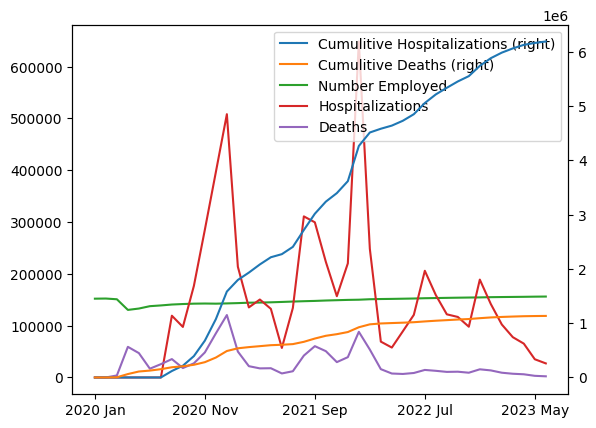

In [30]:
ax = Data.plot.line(y=["Cumulitive Hospitalizations", "Cumulitive Deaths"], secondary_y=True)
Data.plot.line(y=["Number Employed", "Hospitalizations", "Deaths"], ax=ax)

So in looking at all of this data together we can see that two of the first largest months of COVID deaths in March and April 2020 do line up with the largest drop in employment in March 2020, we can also see that by the end of this time period (Jun 2023) there have been over 6 millions hospitalizations and over 1 million deaths, which could help account for the long length of time (the 27 months that we found earlier) that it took to return to the Feb 2020 employment numbers